# 6. Comparisons, Masks, and Boolean Logic

## 6-1. Example

In [2]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [53]:
# 데이터 크롤링

url = 'https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/data/Seattle2014.csv'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

soup_sub = soup.select('th')
columns = [k.get_text().strip() for k in soup_sub]

soup_sub = soup.select('td')
data = [k.get_text().strip() for k in soup_sub]

data = np.array(data)
data = data[data != '']
ncol = len(columns)
nrow = int(len(data) / ncol)
data = data.reshape((nrow, ncol))
data = pd.DataFrame(data, columns=columns)

# 데이터 타입 수정

type_dic = {}
for i in data.columns[3:]:
    type_dic[i] = 'int'
type_dic

data = data.astype(type_dic)
data['DATE'] = pd.to_datetime(data['DATE'])

data.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,2014-01-01,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,2014-01-02,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,2014-01-03,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,2014-01-04,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,2014-01-05,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999


In [59]:
rainfall = data['PRCP'].values
inches = rainfall / 254.0
inches.shape

(365,)

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

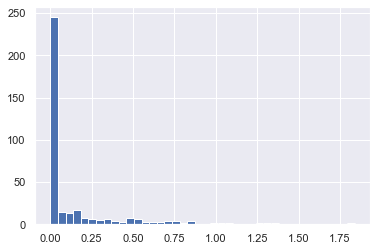

In [61]:
plt.hist(inches, 40);

## 6-2. Comparison Operators as ufuncs

In [75]:
x = np.array([1, 2, 3, 4, 5])

In [76]:
x < 3

array([ True,  True, False, False, False])

In [77]:
x > 3

array([False, False, False,  True,  True])

In [78]:
x <= 3

array([ True,  True,  True, False, False])

In [79]:
x >= 3

array([False, False,  True,  True,  True])

In [80]:
x != 3

array([ True,  True, False,  True,  True])

In [81]:
x == 3

array([False, False,  True, False, False])

In [82]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

In [83]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [84]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

## 6-3. Working with Boolean Arrays

### 6-3-1. Counting entries

In [85]:
np.count_nonzero(x < 6)

8

In [86]:
np.sum(x < 6)

8

In [87]:
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [88]:
np.any(x < 6)

True

In [89]:
np.any(x < 0)

False

In [90]:
np.all(x < 10)

True

In [91]:
np.all(x == 6)

False

In [93]:
np.all(x < 8, axis=1)

array([ True, False,  True])

### 6-3-2. Boolean operators

In [94]:
np.sum((inches > 0.5) & (inches < 1))

29

In [95]:
np.sum(~((inches <= 0.5) | (inches >= 1)))

29

In [96]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


## 6-4. Boolean Arrays as Masks

In [98]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [99]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [100]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [102]:
rainy = (inches > 0)

days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014(inches): ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014(inches): ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014(inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days in 2014(inches): ",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014(inches):  0.19488188976377951
Median precip on summer days in 2014(inches):  0.0
Maximum precip on summer days in 2014(inches):  0.8503937007874016
Median precip on non-summer rainy days in 2014(inches):  0.20078740157480315
